In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## importing stuff
import os
import pickle
from sys import path as syspath
syspath.append(os.path.expanduser("~/srdjan_functs/"))
import numpy as np
np.corrcoef(*np.random.randn(2,3))
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    from caiman import movie as cmovie
    from caiman import load as cload

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

import PicklePicker as pp

from IPython.display import display
import pandas as pd
from islets.Recording import Recording, saveMovie
from islets.Regions1 import Regions
from islets.numeric import power_spectrum, rebin
from islets.utils import show_movie, saveRois
from matplotlib.colors import LogNorm

In [2]:
from copy import copy
fracSaturTh = .05
cmap = copy(plt.cm.Greys)
cmap.set_bad("lime")
pd.set_option('display.max_rows', 100)

In [3]:
# recsSers = [
#     "/data/Sandra/2020/2020_07_15/Experiment60b.lif", ""
# ]

In [4]:
from islets.Recording import import_data

In [5]:
database = import_data("/data/Sandra/",".lif")

/home/jupyter-srdjan/srdjan_functs/islets/Recording.py:21: UserWarning: Can not parse any series from /data/Sandra/2019/2019_08_09/Project027_resize.lif
  warn("Can not parse any series from %s"%rec.path)
/home/jupyter-srdjan/srdjan_functs/islets/Recording.py:21: UserWarning: Can not parse any series from /data/Sandra/2019/2019_08_09/Project27_split_pH_data.lif
  warn("Can not parse any series from %s"%rec.path)


Recording /data/Sandra/pH/Exp41a_74_77_71.lif not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... Recording /data/Sandra/pH/Exp45_74_cont.lif not yet preprocessed. Preprocessing takes a few seconds and will speed up the usage later... 


/home/jupyter-srdjan/srdjan_functs/islets/Recording.py:353: UserWarning: Could not import /data/Sandra/pH/Exp41a_74_77_71.lif
  warn("Could not import %s"%pathToRecording)
/home/jupyter-srdjan/srdjan_functs/islets/Recording.py:353: UserWarning: Could not import /data/Sandra/pH/Exp45_74_cont.lif
  warn("Could not import %s"%pathToRecording)


In [6]:
df = database[[all(["pH" in el, "Glu:12"]) for el in database.protocol.astype(str)]]
df.query("date=='2019-08-08'")[["date","experiment",'series']]

,date,experiment,series
156,2019-08-08,Experiment26.lif,Series009-10
158,2019-08-08,Experiment26.lif,Series021-22
159,2019-08-08,Experiment26.lif,Series029-30
160,2019-08-08,Experiment26.lif,Series034
161,2019-08-08,Experiment26.lif,Series038


In [7]:
ixSeries = 156

In [8]:
from islets.Regions1 import load_regions

In [9]:
analysisFolder = os.path.split(database.loc[ixSeries,"path to protocol"])[0]

In [10]:
picklePath = os.path.join(analysisFolder,sorted([pickPath for pickPath in os.listdir(analysisFolder) if pickPath.endswith("pkl")])[0])

/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:700: RuntimeWarning: invalid value encountered in sqrt
  std = var**.5
/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:701: RuntimeWarning: invalid value encountered in true_divide
  zScore = absFast/std
/home/jupyter-srdjan/srdjan_functs/islets/Regions1.py:537: RuntimeWarning: divide by zero encountered in log
  d = np.digitize(np.log(slow_est), logbs)


130 subsumed into existing ROIs.
77 subsumed into existing ROIs.
28 subsumed into existing ROIs.
3 subsumed into existing ROIs.


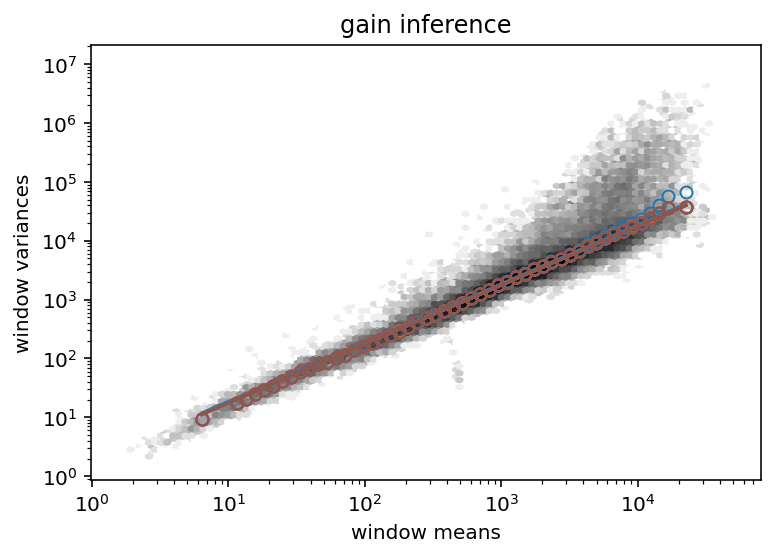

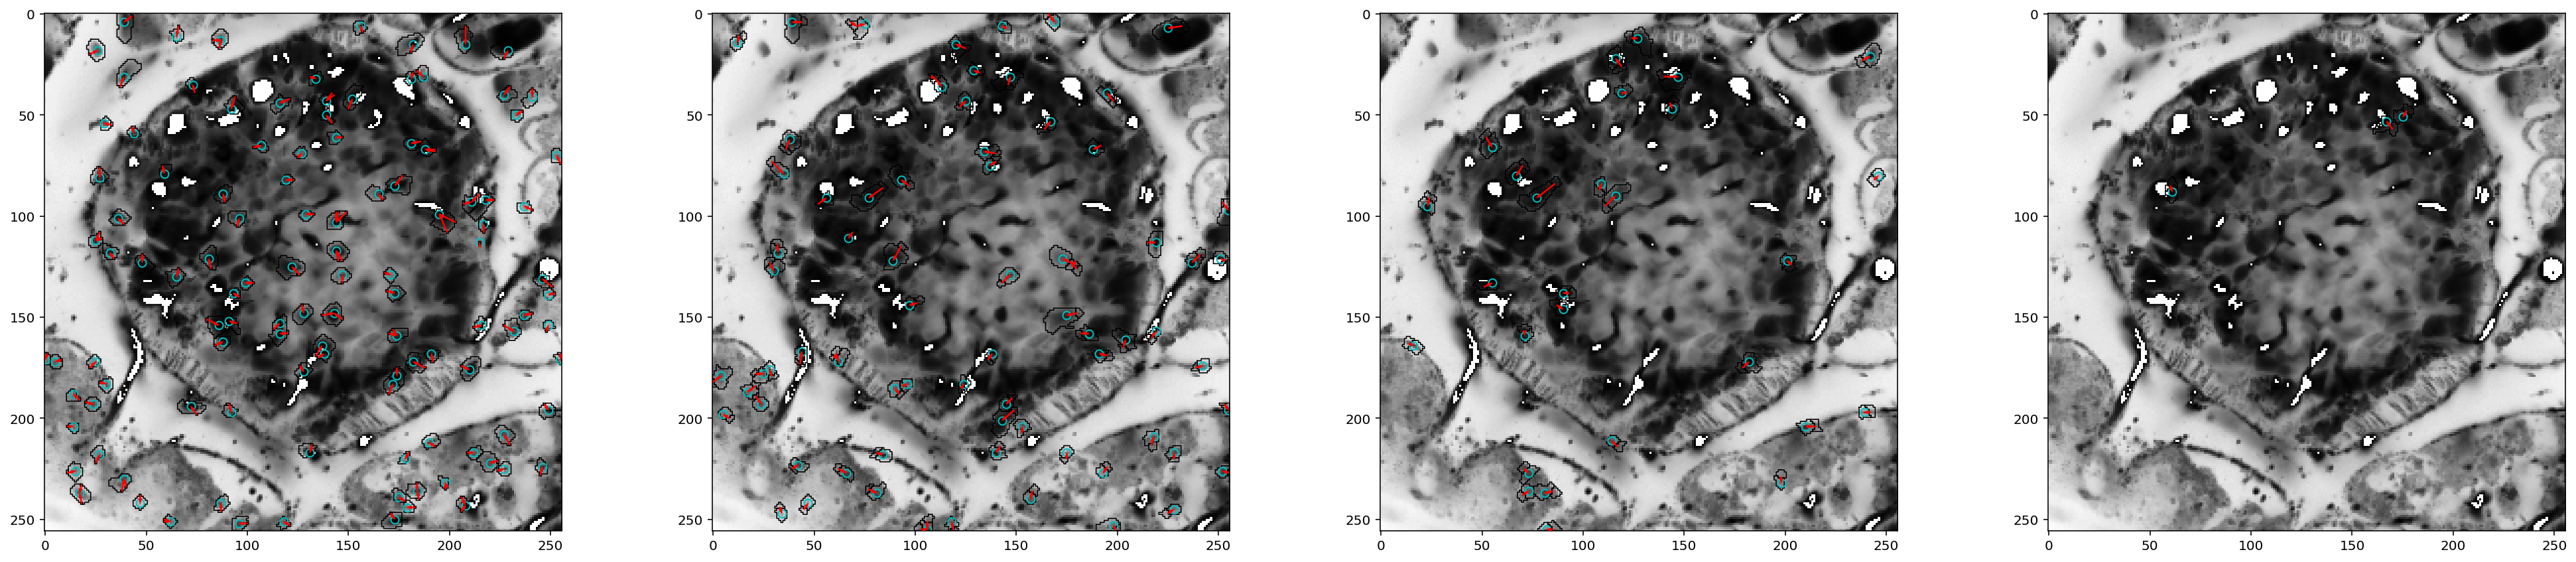

In [11]:
regions = load_regions(picklePath, plot=True, verbose=True)

In [12]:
regions.df = regions.df.iloc[:100]

In [13]:
regions.fast_filter_traces(30, z_sp=0)

In [15]:
regions.slow_filter_traces(30)

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:268: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "percFilter" failed type inference due to: No implementation of function Function(<function nanpercentile at 0x7faf94132200>) found for signature:
 
 >>> nanpercentile(array(float64, 1d, C), float64, axis=Literal[int](0))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'np_nanpercentile': File: numba/np/arraymath.py: Line 1417.
    With argument(s): '(array(float64, 1d, C), float64, axis=int64)':
   Rejected as the implementation raised a specific error:
     TypeError: np_nanpercentile() got an unexpected keyword argument 'axis'
  raised from /opt/tljh/user/envs/physio/lib/python3.7/site-packages/numba/core/typing/templates.py:710

During: resolving callee type: Function(<function nanpercentile at 0x7faf94132200>)
During: typing of call at /home/jupyter-srdjan/srdjan_functs/is

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:268: NumbaWarning:


Compilation is falling back to object mode WITHOUT looplifting enabled because Function "percFilter" failed type inference due to: Unsupported constraint encountered: raise $18call_function.2

File "../../../../jupyter-srdjan/srdjan_functs/islets/numeric.py", line 271:
def percFilter(x_,perc,filterSize):
    <source elided>
    if filterSize%2==0:
        raise ValueError("filter size needs to be odd number")
        ^


/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:268: NumbaWarning:


Compilation is falling back to object mode WITHOUT looplifting enabled because Function "percFilter" failed type inference due to: Unsupported constraint encountered: raise $18call_function.2

File "../../../../jupyter-srdjan/srdjan_functs/islets/numeric.py", line 271:
def percFilter(x_,perc,filterSize):
    <source elided>
    if filterSize%2==0:
        raise ValueError("filter size needs to be odd number")
        ^


/h

/home/jupyter-srdjan/srdjan_functs/islets/numeric.py:268: NumbaWarning:


Compilation is falling back to object mode WITHOUT looplifting enabled because Function "percFilter" failed type inference due to: Unsupported constraint encountered: raise $18call_function.2

File "../../../../jupyter-srdjan/srdjan_functs/islets/numeric.py", line 271:
def percFilter(x_,perc,filterSize):
    <source elided>
    if filterSize%2==0:
        raise ValueError("filter size needs to be odd number")
        ^


/opt/tljh/user/envs/physio/lib/python3.7/site-packages/numba/core/object_mode_passes.py:178: NumbaWarning:

Function "percFilter" was compiled in object mode without forceobj=True, but has lifted loops.

File "../../../../jupyter-srdjan/srdjan_functs/islets/numeric.py", line 270:
def percFilter(x_,perc,filterSize):
    if filterSize%2==0:
    ^




In [18]:
regions.examine3()